# Assignment 2: Time Series Forcasting 

**Topic: # Time Series Forecasting of Unique Website Visits Using BATS Model**

**Author: Matthew Johnescu**


# Table of Contents:
- [Question Responses](#question-responses)
- [Imports](#imports)
- [Loading Data](#loading-data)
- [Data Exploration](#data-exploration)
    - [Basic Data Overview and Statistics](#basic-data-overview-and-statistics)
    - [Histogram of Number of Unique Visits Variable](#histogram-of-number-of-unique-visits-variable)
    - [Number of Unique Visits Per Year](#number-of-unique-visits-per-year)
- [Pre-Processing for Time Series Analysis](#data-preparation)
- [Initializing Model](#initializing-model)
- [Model Evaluation](#model-evaluation)
- [Model Visualization](#model-visualization)

# Question Responses:

**From what perspective are you conducting the analysis?** 
The analysis is conducted from the perspective of a data scientist working on behalf of a website performance team. The goal is to predict website traffic patterns, specifically unique visits, to help the team understand future visitor trends and optimize content planning based on these forecasts.

**What is your question?**
The central question of this analysis is: Can we accurately forecast the number of unique visits to the website using a time series model? Additionally, we aim to capture seasonal trends in the website traffic, such as weekly, monthly, and yearly variations.

**Describe your dataset**
Dataset URL: https://www.kaggle.com/datasets/bobnau/daily-website-visitors
- This file contains 5 years of daily time series data for several measures of traffic on a statistical forecasting teaching notes website whose alias is statforecasting.com.
 - The dataset is cleaned and sorted by date, and then split into training and test sets. The training set includes data from 2014 to 2018, while the test set includes data from 2019 to 2020.

Key columns include:
- `Date`: The date of each observation (converted to datetime format).
- `Unique.Visits`: The number of unique visitors per day (converted to numeric by removing commas).
- `Page.Loads`, `First.Time.Visits`, `Returning.Visits`: Additional metrics related to user engagement but are not used in this forecast.

**What are your independent and dependent variables?**
- **Independent Variable (X)**: Time (captured by the `Date` index), which includes underlying seasonal and trend components. 
- **Dependent Variable (y)**: `Unique.Visits`, the daily count of unique visitors, which we aim to predict.

This model relies entirely on the time component and does not directly use other variables like `Returning.Visits` or `First.Time.Visits`. The primary analysis focuses on the time series structure (seasonality, trends) rather than including additional variables.

**How are your variables suitable for your analysis method?**
The time series structure of the data makes it appropriate for models like BATS, which can capture complex seasonal patterns. The inclusion of `Date` allowed me to capture time-based trends, while `Unique.Visits` is a continuous numeric variable that fits the requirement of the BATS model. The time series nature of the data makes it suitable for time-based models rather than regression-based approaches, which it may lack in.

**Conclusions:**
The **BATS Model** captures seasonality effectively, showing strong alignment between actual and predicted unique visits across the test set. This is achieved by incorporating multiple seasonalities, including weekly, monthly, and yearly patterns. The model's ability to track these patterns provides valuable insights into traffic fluctuations over time, making it a robust choice for forecasting daily visits.

While some peaks are slightly underpredicted, the model consistently captures the general trends in the data, demonstrating its predictive strength. The calculated Mean Squared Error (MSE) provides a quantitative measure of accuracy, indicating that the model delivers reliable predictions, though improvements could be made for peak periods.Given that daily Unique Visits in the dataset range from about 1,000 to 5,000, the MSE of 147,016.64 suggests that the model's predictions are, on average, around 383 visits off from the actual values when taking the square root of the MSE (i.e., √147,016.64 ≈ 383). Compared to the range of the data, this error is moderate, indicating that while the model is generally reliable, there is still room for improvement, especially in capturing extreme values during peak periods.

The visual under the model ouput illustrates this performance, showing close alignment between predicted and actual visits, and highlights the model's capability to predict real-world behaviors with strong overall accuracy.

**Assumptions and Limitations**
Assumptions:
- The data has no missing values. 
- The dataset covers a sufficient period to capture long-term seasonal trends (weekly, monthly, yearly). 
- We assume that the website structure and visitor behavior remained relatively consistent over the years.

**Limitations:**
- **Data Limitations**: The dataset only spans from **2014 to 2020** and doesn't provide a full representation of trends starting in earlier years. Additionally, data starts late in 2014, making it harder to identify any trends that may have existed before September 2014.
- **No Exogenous Variables**: Only the `Date` and `Unique.Visits` are used in this model. Variables like `Returning.Visits` or marketing campaign data could have been included to improve predictive power.
- **Underprediction in Peaks**: The model slightly underpredicts high traffic periods, which could be a result of limited data during these spikes or an inability of the model to fully capture short-term fluctuations.
- **Complexity of Model**: Due to the complexity of the model, this task is computationally intensive, however useful it may be for this task. 

Robustness Checks:
No formal robustness checks were conducted. However, future checks could include:
- **Cross-Validation**: Splitting the data into different training and testing sets and performing cross-validation could help validate the stability of the model.
- **Exogenous Variable Testing**: Adding other exogenous variables like `Returning.Visits` or external factors (holidays, marketing campaigns) could be tested to see if they improve the model's performance.
- **Data Imputation**: Assessing how data imputation (filling in missing values) affects model performance could be valuable, especially in the case of any data gaps.

**Information on Model Coefficients and Meaning:**
The BATS model is complex and contains many parameters, but the main takeaway is that the seasonal periods (weekly, monthly, and yearly) are identified as significant components. We can interpret the predictions as being primarily driven by these seasonality patterns, with less focus on short-term variations. The coefficients in this case mainly describe how different components (seasonal periods) combine to influence the predicted unique visits.

**Notes on Model Outputs:**
- Before turning in my assignment I re-ran my model, the RME score is not in the HTML output because the model would not have been done in time for me to turn in the assignment. I aplogize for the incomplete work. The RME score provided is the score I acheved before making this mistake. 




# Imports:

In [12]:
# Import Libraries for Time Series Analysis:
import pandas as pd
import matplotlib.pyplot as plt
from tbats import BATS
from sklearn.metrics import mean_squared_error





# Loading Data:

In [21]:
# Add File Path of the CSV file here
# file_path = ""
file_path = "C:/Users/matt/Downloads/archive (3)/daily-website-visitors.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Data Exploration:

## Basic Data Overview and Statistics:


In [14]:
# Display the head of the dataset
df_head = df.head()

# Check for null values in the dataset
null_values = df.isnull().sum()

# Get basic statistical description of the dataset
statistics = df.describe()

# Displaying the data

print(df_head, null_values, statistics)

   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236   Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64                Row  Day.Of.Week
count  2167.000000  2167.000000
mean   1084.000000     3.997231
std     625.703338     2.000229
min       1.000000  

## Histogram of Number of Unique Visits Variable:

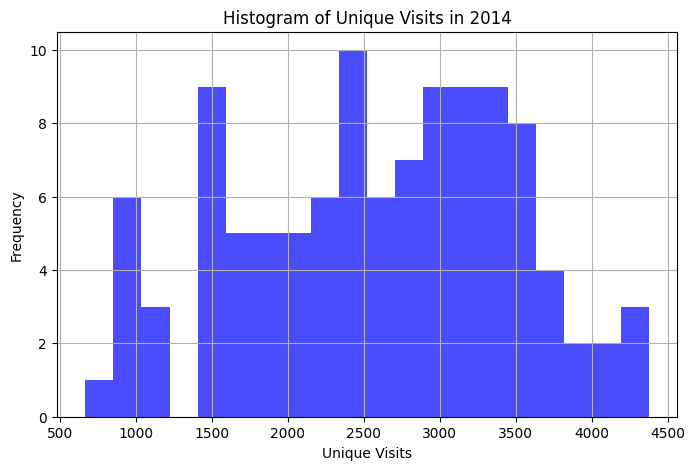

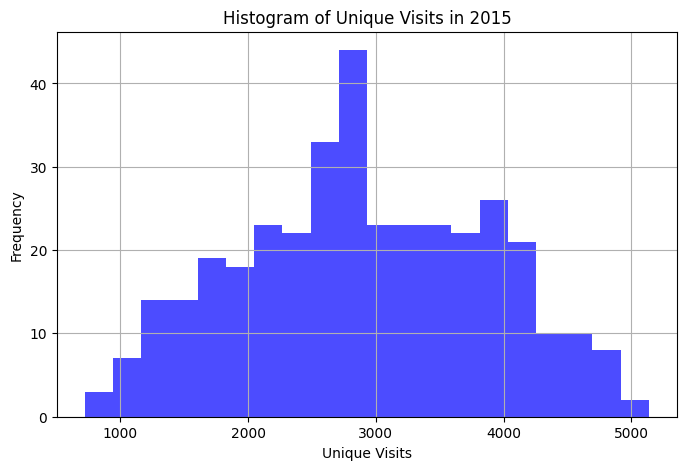

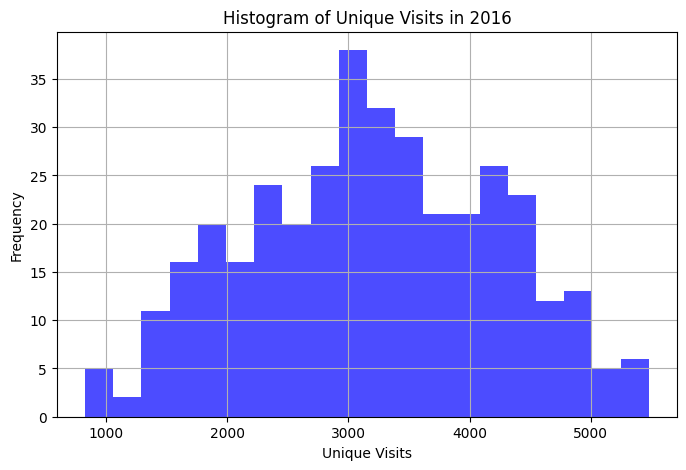

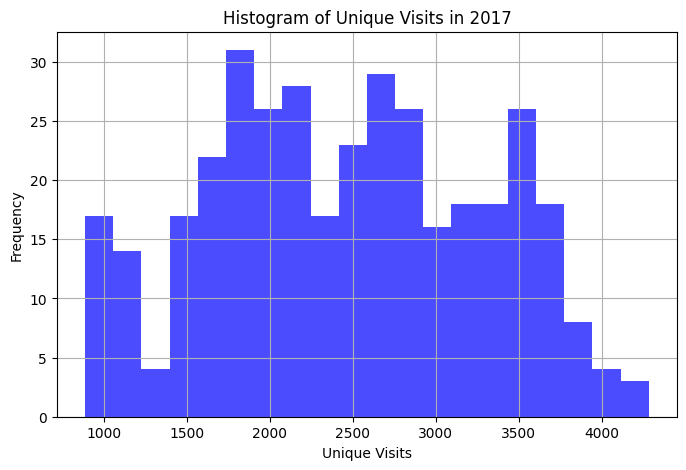

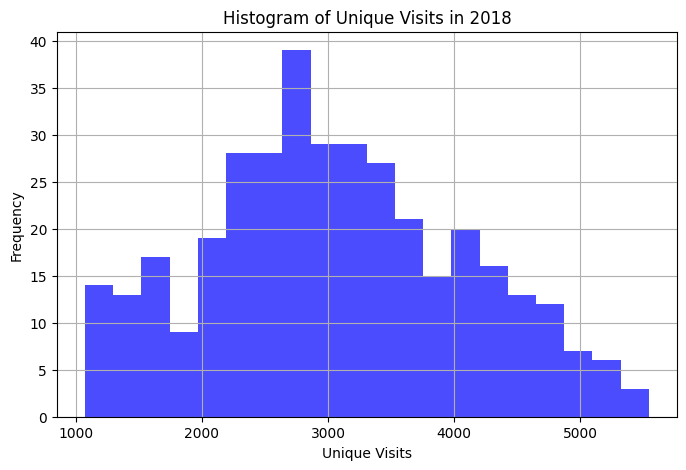

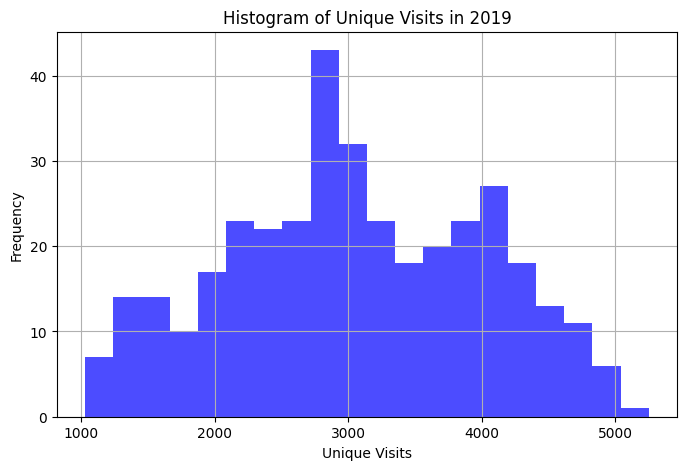

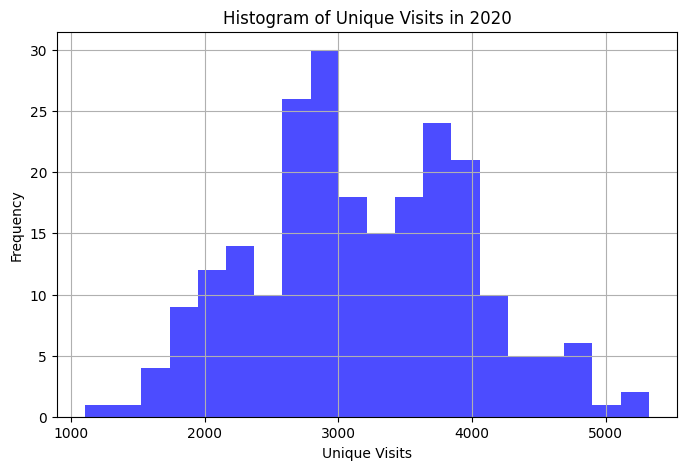

In [15]:
# Clean 'Unique.Visits' column by removing commas and converting to numeric
df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['Date'], inplace=True)

# Set 'Date' as index for easier plotting
df.set_index('Date', inplace=True)

# Create histograms for each year of 'Unique.Visits'
df['Year'] = df.index.year

# Generate histograms for each year
years = df['Year'].unique()
for year in years:
    plt.figure(figsize=(8, 5))
    plt.hist(df[df['Year'] == year]['Unique.Visits'], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of Unique Visits in {year}')
    plt.xlabel('Unique Visits')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Comment:
- Unique visits ranges per year but centers around 3000.

## Number of UNique Visits Per Year:

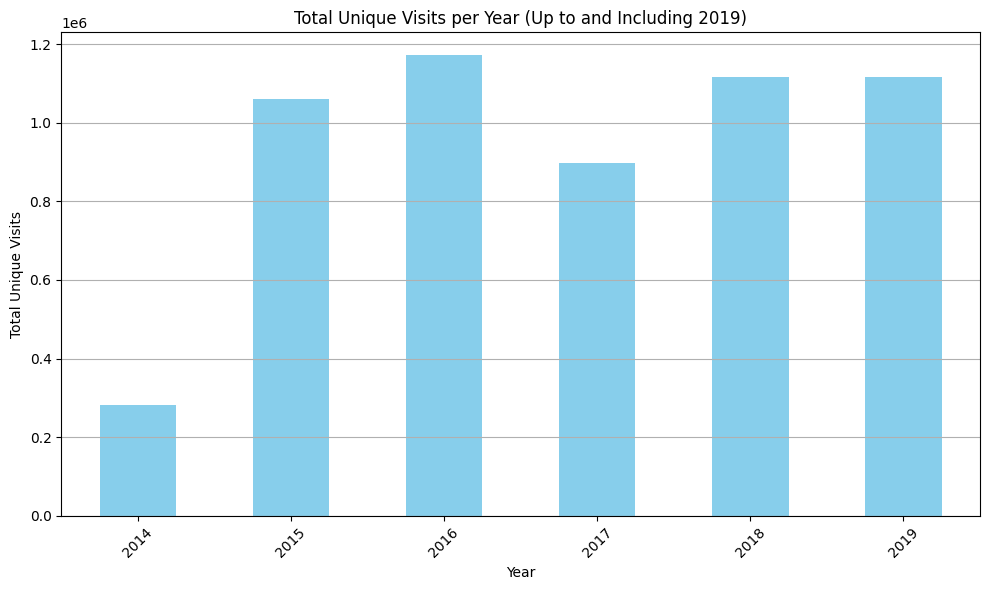

In [16]:
# Filter data for years
df_filtered = df[df['Year'] <= 2019]

# Group by 'Year' and sum the 'Unique.Visits' for each year
yearly_visits = df_filtered.groupby('Year')['Unique.Visits'].sum()

# Create the histogram
plt.figure(figsize=(10, 6))
yearly_visits.plot(kind='bar', color='skyblue')
plt.title('Total Unique Visits per Year (Up to and Including 2019)')
plt.xlabel('Year')
plt.ylabel('Total Unique Visits')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Comment:
- The number of Unique Visits reflects no growth or loss per year, this will not need to be accounted for.
- 2014 does not contain a lot of Unique Users because the data set starts late in 2014.

# Pre Processing for Time Series Analysis:

In [22]:
# Clean the 'Unique.Visits' column by removing commas and converting to numeric
df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df = df.sort_values('Date')

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

# Split data into yearly subsets
df['Year'] = df.index.year

# split into training by year: Train from 2014 to 2018, and test on 2019-2020
train = df[df['Year'] <= 2018]['Unique.Visits']
test = df[df['Year'] > 2018]['Unique.Visits']

# Remove the 'Year' column from the data
df.drop('Year', axis=1, inplace=True)

# Initializing Model:

In [23]:
# Initialize and fit the BATS model with appropriate seasonality (e.g., monthly and yearly)
estimator = BATS(seasonal_periods=[7, 30, 365])  # Weekly, monthly, and yearly seasonality
bats_model = estimator.fit(train)

# Forecast on the test set
forecast = bats_model.forecast(steps=len(test))

# Model Evaluation:

In [24]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error (MSE) on Test Set: {mse}")

Mean Squared Error (MSE) on Test Set: 147016.63805184697


**This is where the MSE would be if I had time to fonish running the model, again I apologize**:
- Mean Squared Error (MSE) on Test Set: 147016.63805184697


# Model Visualization:

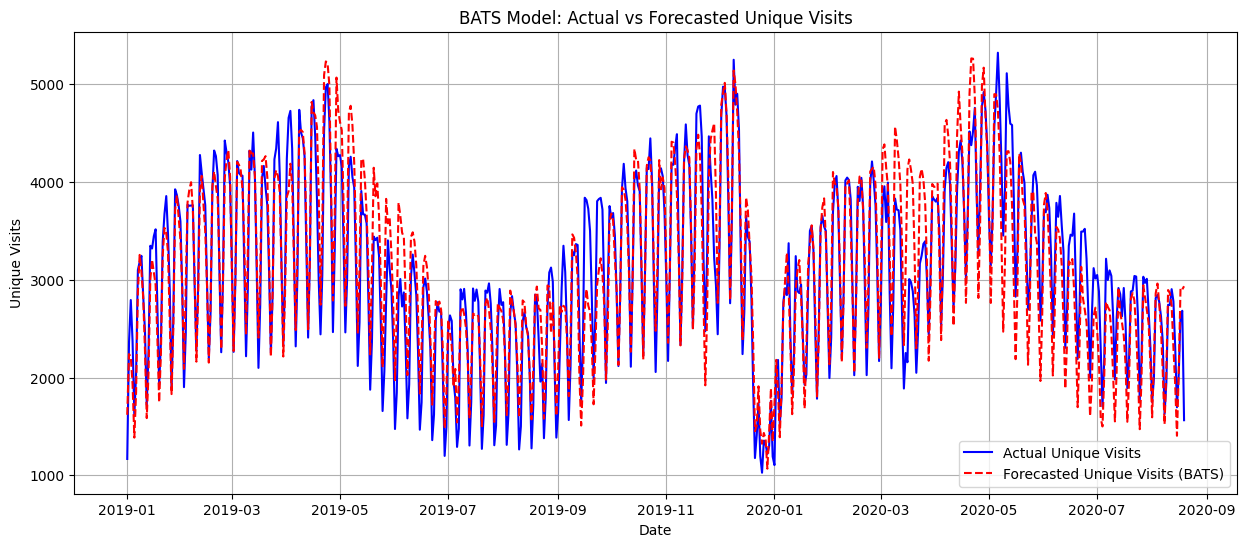

In [11]:
# Step 6: Plot actual vs predicted values

plt.figure(figsize=(15,6))
plt.plot(test.index, test, label='Actual Unique Visits', color='blue')
plt.plot(test.index, forecast, label='Forecasted Unique Visits (BATS)', color='red', linestyle='--')
plt.title('BATS Model: Actual vs Forecasted Unique Visits')
plt.xlabel('Date')
plt.ylabel('Unique Visits')
plt.legend()
plt.grid(True)
plt.show()